In [11]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


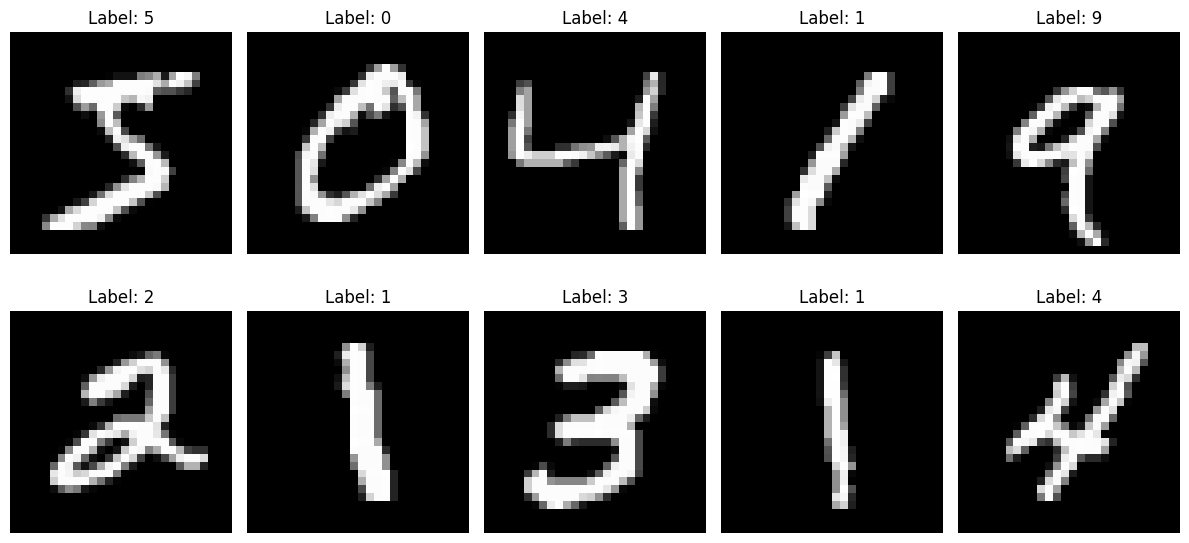

In [12]:
# Classification task
# Let's visualize some random samples from MNIST
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {train_y[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()



# Train a logistic regression model
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize some test samples and their predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Predicted: {y_pred[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


ValueError: Found array with dim 3. LogisticRegression expected <= 2.

Segmentation

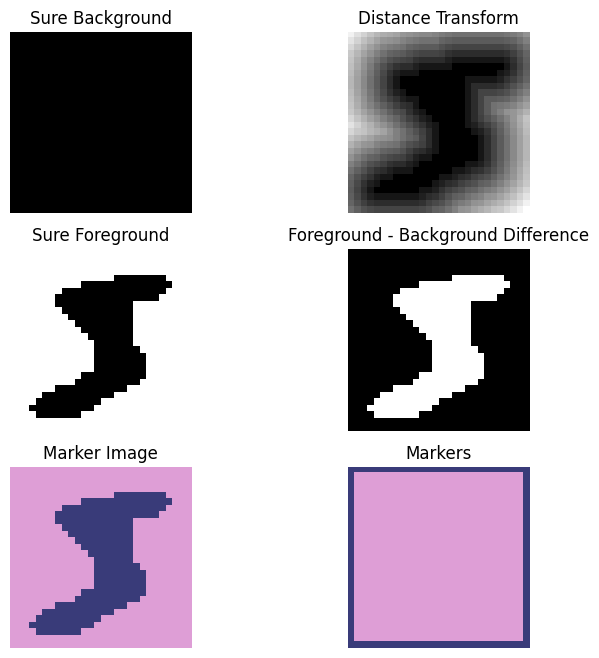

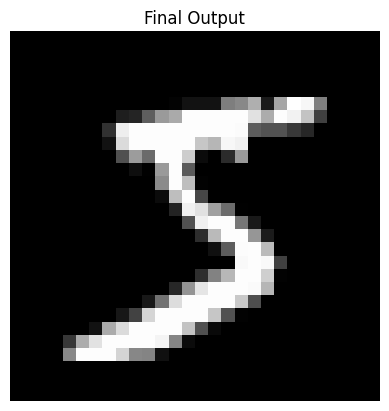

In [17]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, _), (_, _) = mnist.load_data()

# Choose a sample image
sample_image = x_train[0]

def imshow(image, ax=None, title=None):
    if ax is None:
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    else:
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        ax.set_title(title)

def watershed_algorithm(image):
    _, bin_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=2)

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

    # Background
    sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
    imshow(sure_bg, ax=axes[0, 0])
    axes[0, 0].set_title('Sure Background')

    # Distance Transform
    dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
    imshow(dist, ax=axes[0, 1])
    axes[0, 1].set_title('Distance Transform')

    # Foreground
    _, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
    sure_fg = sure_fg.astype(np.uint8)
    imshow(sure_fg, ax=axes[1, 0])
    axes[1, 0].set_title('Sure Foreground')

    # Foreground - Background Difference
    bg_fg_diff = cv2.subtract(sure_bg, sure_fg)
    imshow(bg_fg_diff, ax=axes[1, 1])
    axes[1, 1].set_title('Foreground - Background Difference')

    _, markers = cv2.connectedComponents(sure_fg)

    markers += 1
    markers[bg_fg_diff == 255] = 0

    axes[2, 0].imshow(markers, cmap="tab20b")
    axes[2, 0].set_title("Marker Image")
    axes[2, 0].axis('off')

    markers = cv2.watershed(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB), markers)

    axes[2, 1].imshow(markers, cmap="tab20b")
    axes[2, 1].axis('off')
    axes[2, 1].set_title("Markers")
    plt.show()

    labels = np.unique(markers)

    contours = []
    for label in labels[2:]:
        target = np.where(markers == label, 255, 0).astype(np.uint8)
        _, contour, _ = cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours.append(contour[0])

    img_copy = np.copy(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
    img = cv2.drawContours(img_copy, contours, -1, color=(0, 150, 0), thickness=4)
    imshow(img, title='Final Output')

# Apply watershed algorithm on the sample image
watershed_algorithm(sample_image)


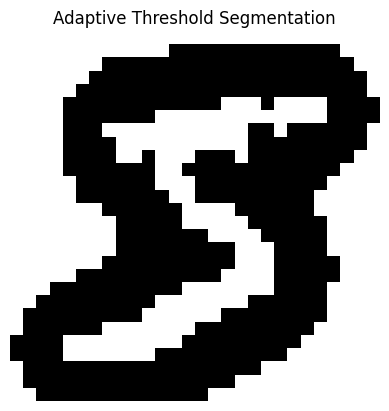

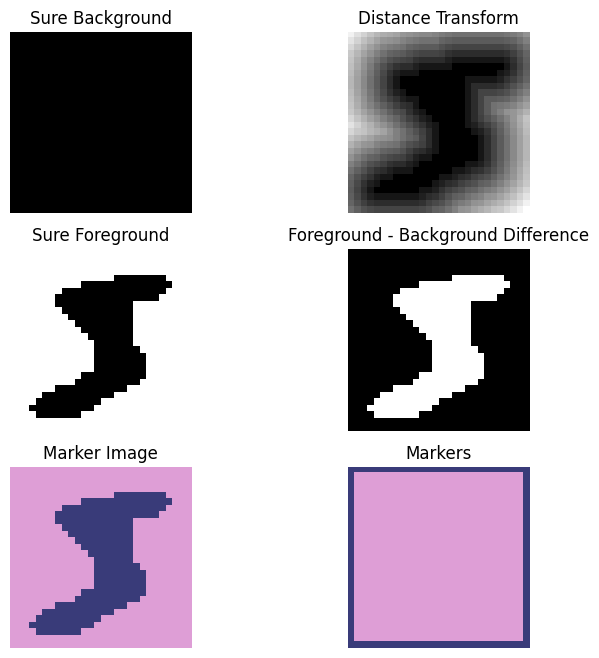

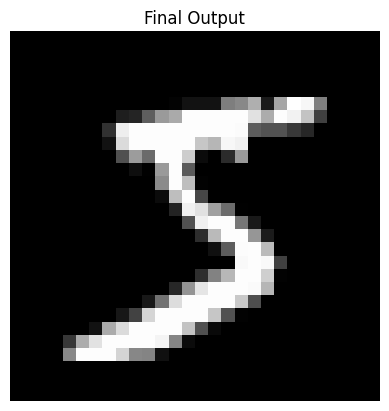

In [18]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, _), (_, _) = mnist.load_data()

# Choose a sample image
sample_image = x_train[0]

def imshow(image, ax=None, title=None):
    if ax is None:
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    else:
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        ax.set_title(title)

def threshold_segmentation(image):
    _, img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return img

def adaptive_threshold_segmentation(image):
    img = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return img

def watershed_algorithm(image):
    _, bin_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=2)

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

    # Background
    sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
    imshow(sure_bg, ax=axes[0, 0])
    axes[0, 0].set_title('Sure Background')

    # Distance Transform
    dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
    imshow(dist, ax=axes[0, 1])
    axes[0, 1].set_title('Distance Transform')

    # Foreground
    _, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
    sure_fg = sure_fg.astype(np.uint8)
    imshow(sure_fg, ax=axes[1, 0])
    axes[1, 0].set_title('Sure Foreground')

    # Foreground - Background Difference
    bg_fg_diff = cv2.subtract(sure_bg, sure_fg)
    imshow(bg_fg_diff, ax=axes[1, 1])
    axes[1, 1].set_title('Foreground - Background Difference')

    _, markers = cv2.connectedComponents(sure_fg)

    markers += 1
    markers[bg_fg_diff == 255] = 0

    axes[2, 0].imshow(markers, cmap="tab20b")
    axes[2, 0].set_title("Marker Image")
    axes[2, 0].axis('off')

    markers = cv2.watershed(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB), markers)

    axes[2, 1].imshow(markers, cmap="tab20b")
    axes[2, 1].axis('off')
    axes[2, 1].set_title("Markers")
    plt.show()

    labels = np.unique(markers)

    contours = []
    for label in labels[2:]:
        target = np.where(markers == label, 255, 0).astype(np.uint8)
        _, contour, _ = cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours.append(contour[0])

    img_copy = np.copy(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
    img = cv2.drawContours(img_copy, contours, -1, color=(0, 150, 0), thickness=4)
    imshow(img, title='Final Output')

# Apply threshold segmentation on the sample image
thresholded_image = threshold_segmentation(sample_image)
imshow(thresholded_image, title='Threshold Segmentation')

# Apply adaptive threshold segmentation on the sample image
adaptive_thresholded_image = adaptive_threshold_segmentation(sample_image)
imshow(adaptive_thresholded_image, title='Adaptive Threshold Segmentation')

# Apply watershed algorithm on the sample image
watershed_algorithm(sample_image)


##  Image Denoising (Wiener Filters, MAP and Autoencoder)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 156ms/step - loss: 0.2520 - val_loss: 0.1169
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 163ms/step - loss: 0.1155 - val_loss: 0.1099
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 162ms/step - loss: 0.1082 - val_loss: 0.1065
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 157ms/step - loss: 0.1051 - val_loss: 0.1031
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 162ms/step - loss: 0.1031 - val_loss: 0.1013
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 159ms/step - loss: 0.1015 - val_loss: 0.1002
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 159ms/step - loss: 0.1008 - val_loss: 0.0992
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 162ms/step - loss: 0.0999 - val_loss: 0.0985
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 165ms/step - loss: 0.0995 - val_loss: 0.0979
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 164ms/step - loss: 0.0987 - val_loss: 0.0973
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


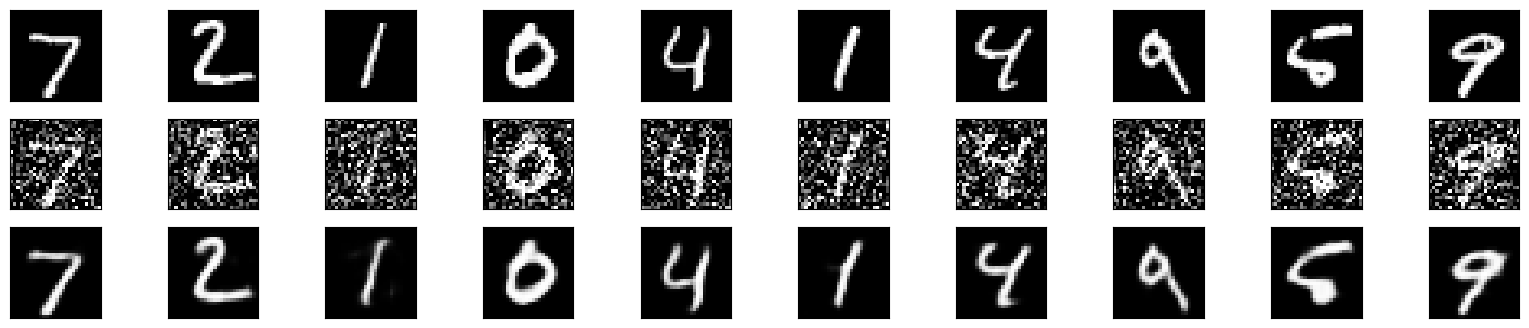

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Add Gaussian noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip pixel values to range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Reshape data for convolutional autoencoder
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))

# Define autoencoder architecture
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Denoise test images
denoised_images = autoencoder.predict(x_test_noisy)

# Plot original, noisy, and denoised images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Image Enhancement (Intensity Transformations, Contract enhancement, histogram processing, spatial filtering)


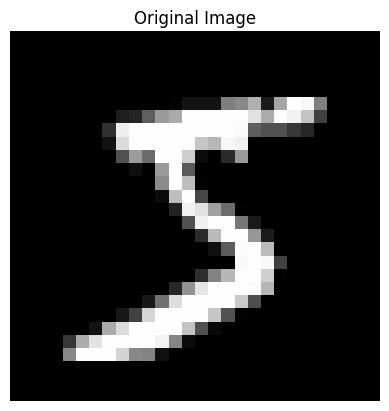

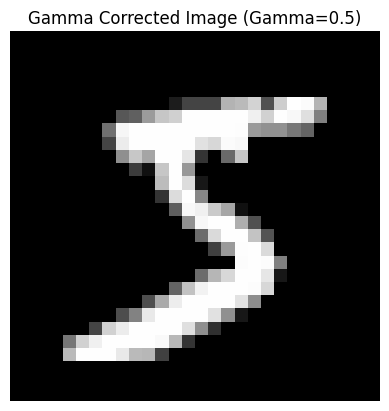

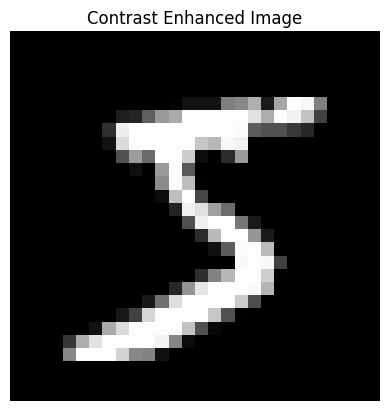

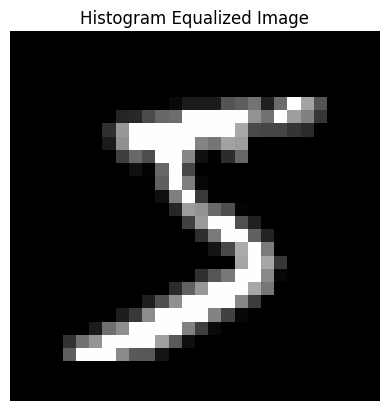

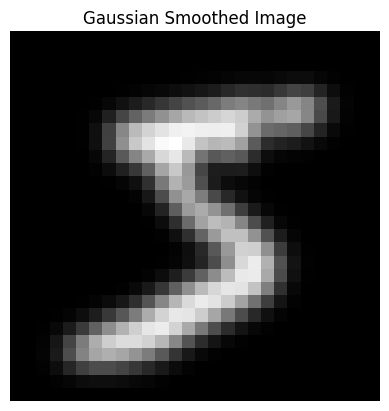

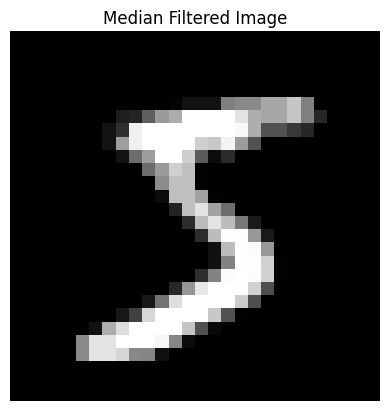

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage import exposure, filters
from scipy.ndimage import gaussian_filter

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Display original MNIST image
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Select a sample image
sample_image = x_train[0]

# Display original image
display_image(sample_image, "Original Image")

# Intensity Transformation - Gamma Correction
gamma_corrected = exposure.adjust_gamma(sample_image, gamma=0.5)
display_image(gamma_corrected, "Gamma Corrected Image (Gamma=0.5)")

# Contrast Enhancement
enhanced_contrast = exposure.rescale_intensity(sample_image, in_range='image', out_range=(0, 255))
display_image(enhanced_contrast, "Contrast Enhanced Image")

# Histogram Processing - Histogram Equalization
equalized_image = exposure.equalize_hist(sample_image)
display_image(equalized_image, "Histogram Equalized Image")

# Spatial Filtering - Gaussian Smoothing
smoothed_image = gaussian_filter(sample_image, sigma=1)
display_image(smoothed_image, "Gaussian Smoothed Image")

# Spatial Filtering - Median Filtering
median_filtered_image = filters.median(sample_image)
display_image(median_filtered_image, "Median Filtered Image")


## Image Restoration (Inverse Fileter, Wiener Filter, MAP Formulation, Wavelets)


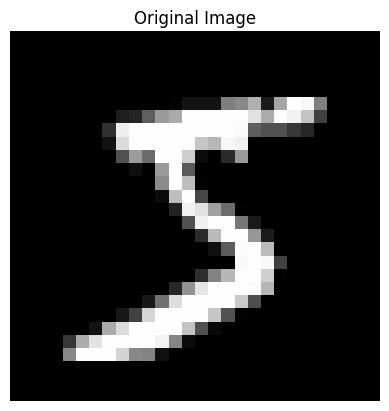

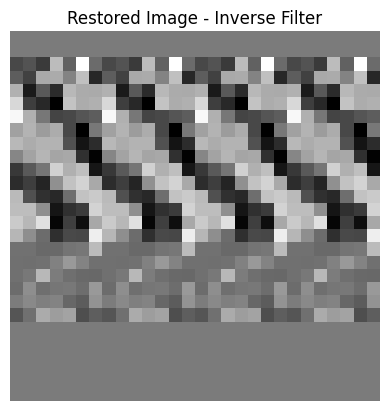

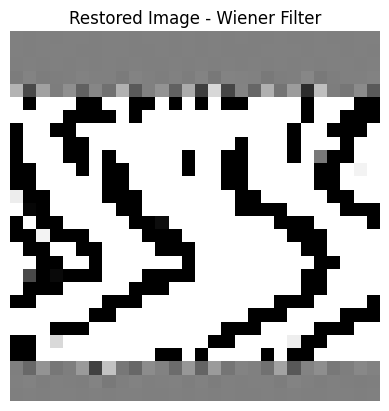

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

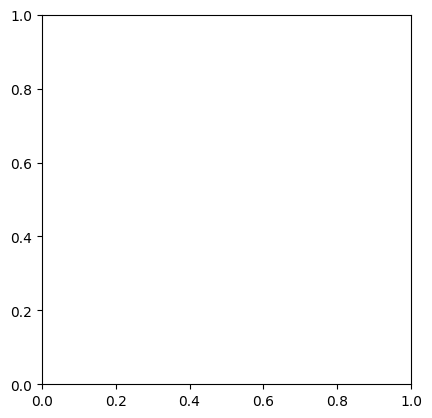

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage import restoration
import pywt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Display original MNIST image
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Select a sample image
sample_image = x_train[0]

# Display original image
display_image(sample_image, "Original Image")

# Image Restoration - Inverse Filter
def inverse_filter(image, kernel):
    padded_kernel = np.pad(kernel, ((0, image.shape[0] - kernel.shape[0]), (0, image.shape[1] - kernel.shape[1])), 'constant')
    return np.fft.ifft2(np.fft.fft2(image) / np.fft.fft2(padded_kernel)).real

# Create a motion blur kernel
motion_blur_kernel = np.zeros((7, 7))
motion_blur_kernel[int((7-1)/2), :] = 1

# Apply inverse filter to remove motion blur
restored_inverse = inverse_filter(sample_image, motion_blur_kernel)
display_image(restored_inverse, "Restored Image - Inverse Filter")

# Image Restoration - Wiener Filter
def wiener_filter(image, kernel, balance=0.001):
    return restoration.wiener(image, kernel, balance=balance)

# Apply Wiener filter for noise reduction
restored_wiener = wiener_filter(sample_image, motion_blur_kernel)
display_image(restored_wiener, "Restored Image - Wiener Filter")

# Image Restoration - MAP Formulation
def map_formulation(image, kernel):
    return restoration.unsupervised_wiener(image, kernel)

restored_map = map_formulation(sample_image, motion_blur_kernel)
display_image(restored_map, "Restored Image - MAP Formulation")

# Image Restoration - Wavelet Denoising
def wavelet_denoising(image):
    coeffs2 = pywt.dwt2(image, 'haar')
    coeffs2 = list(coeffs2)
    coeffs2[0] = np.zeros_like(coeffs2[0])
    denoised_image = pywt.idwt2(coeffs2, 'haar')
    return denoised_image

# Apply wavelet denoising
noisy_image = sample_image + np.random.normal(loc=0, scale=25, size=sample_image.shape)
denoised_wavelet = wavelet_denoising(noisy_image)
display_image(denoised_wavelet, "Denoised Image - Wavelet Denoising")


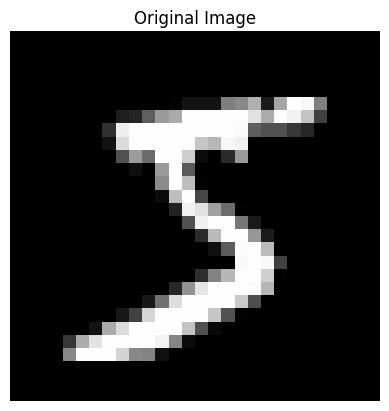

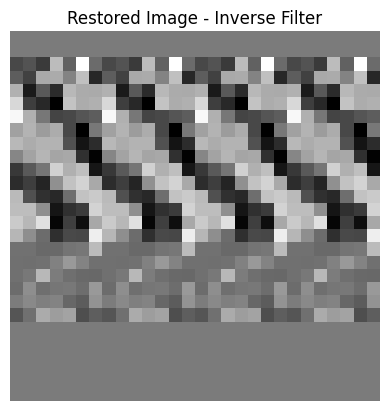

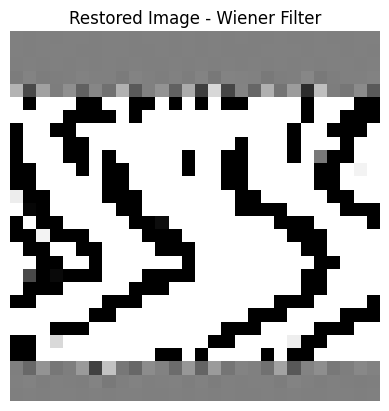

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

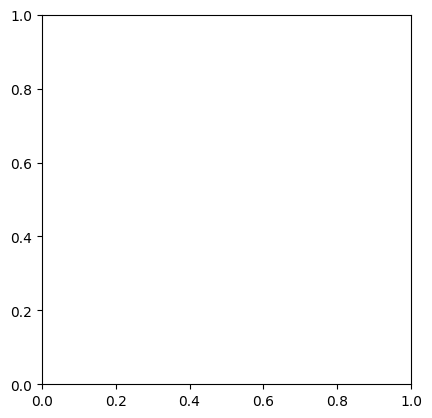

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage import restoration
import pywt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Display original MNIST image
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Select a sample image
sample_image = x_train[0]

# Display original image
display_image(sample_image, "Original Image")

# Image Restoration - Inverse Filter
def inverse_filter(image, kernel):
    padded_kernel = np.pad(kernel, ((0, image.shape[0] - kernel.shape[0]), (0, image.shape[1] - kernel.shape[1])), 'constant')
    return np.fft.ifft2(np.fft.fft2(image) / np.fft.fft2(padded_kernel)).real

# Create a motion blur kernel
motion_blur_kernel = np.zeros((7, 7))
motion_blur_kernel[int((7-1)/2), :] = 1

# Apply inverse filter to remove motion blur
restored_inverse = inverse_filter(sample_image, motion_blur_kernel)
display_image(restored_inverse, "Restored Image - Inverse Filter")

# Image Restoration - Wiener Filter
def wiener_filter(image, kernel, balance=0.001):
    return restoration.wiener(image, kernel, balance=balance)

# Apply Wiener filter for noise reduction
restored_wiener = wiener_filter(sample_image, motion_blur_kernel)
display_image(restored_wiener, "Restored Image - Wiener Filter")

# Image Restoration - MAP Formulation
def map_formulation(image, kernel):
    return restoration.unsupervised_wiener(image, kernel)

# Apply MAP formulation for restoration
restored_map = map_formulation(sample_image, motion_blur_kernel)
display_image(restored_map, "Restored Image - MAP Formulation")

# Image Restoration - Wavelet Denoising
def wavelet_denoising(image):
    coeffs2 = pywt.dwt2(image, 'haar')
    coeffs2 = list(coeffs2)
    coeffs2[0] = np.zeros_like(coeffs2[0])
    denoised_image = pywt.idwt2(coeffs2, 'haar')
    return denoised_image

# Apply wavelet denoising
noisy_image = sample_image + np.random.normal(loc=0, scale=25, size=sample_image.shape)
denoised_wavelet = wavelet_denoising(noisy_image)
display_image(denoised_wavelet, "Denoised Image - Wavelet Denoising")


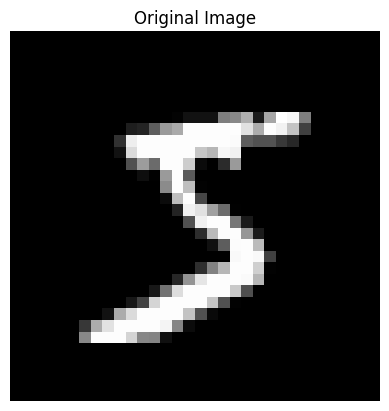

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 205s 130ms/step - accuracy: 0.6974 - loss: 0.9467 - val_accuracy: 0.8907 - val_loss: 0.3578


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.models import Model
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.resnet50 import preprocess_input

# Load MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

# Resize MNIST images to 32x32 to match the input size required by ResNet50
x_train_resized = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_train_resized = np.repeat(x_train_resized, 3, axis=-1)  # Convert to RGB format
x_train_resized = np.pad(x_train_resized, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')  # Pad to 32x32
x_train_resized = x_train_resized.astype('float32') / 255  # Normalize
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode labels

# Display original MNIST image
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

sample_image = x_train_resized[0]
display_image(sample_image.squeeze(), "Original Image")

# Define ResNet50 model
input_tensor = Input(shape=(32, 32, 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Add custom layers for MNIST classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_resized, y_train, epochs=1, batch_size=32, validation_split=0.2)


In [38]:
# Assume you have two images: original_image and reconstructed_image
original_image = x_train_resized[0]  # Example original image
reconstructed_image = model.predict(np.expand_dims(original_image, axis=0))[0]  # Example reconstructed image

# Calculate PSNR
psnr_value = psnr(original_image, reconstructed_image)
print("PSNR:", psnr_value)

# Calculate SSIM
ssim_value = ssim(original_image, reconstructed_image, multichannel=True)
print("SSIM:", ssim_value)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


ValueError: Input images must have the same dimensions.

In [39]:
from skimage.transform import resize

# Assume you have two images: original_image and reconstructed_image
original_image = x_train_resized[0]  # Example original image
reconstructed_image = model.predict(np.expand_dims(original_image, axis=0))[0]  # Example reconstructed image

# Resize the reconstructed image to match the dimensions of the original image
reconstructed_image = resize(reconstructed_image, original_image.shape)

# Calculate PSNR
psnr_value = psnr(original_image, reconstructed_image)
print("PSNR:", psnr_value)

# Calculate SSIM
ssim_value = ssim(original_image, reconstructed_image, multichannel=True)
print("SSIM:", ssim_value)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
PSNR: 9.283852045688354


ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

In [40]:
from skimage.transform import resize

# Assume you have two images: original_image and reconstructed_image
original_image = x_train_resized[0]  # Example original image
reconstructed_image = model.predict(np.expand_dims(original_image, axis=0))[0]  # Example reconstructed image

# Resize the reconstructed image to match the dimensions of the original image
reconstructed_image = resize(reconstructed_image, original_image.shape)

# Calculate PSNR
psnr_value = psnr(original_image, reconstructed_image)
print("PSNR:", psnr_value)

# Calculate SSIM with a smaller window size (e.g., 5x5)
ssim_value = ssim(original_image, reconstructed_image, win_size=5, multichannel=True)
print("SSIM:", ssim_value)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
PSNR: 9.283852045688354


ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

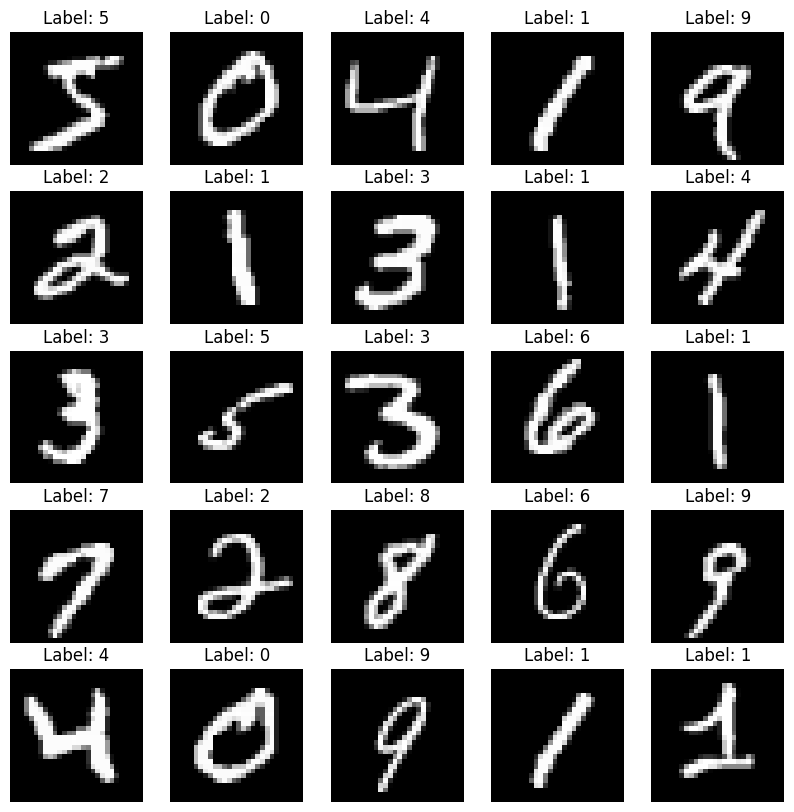

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

# Display ground truth images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()
